In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


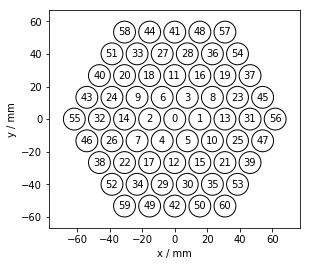

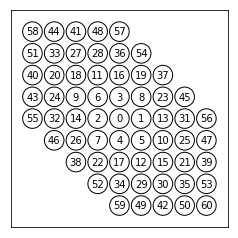

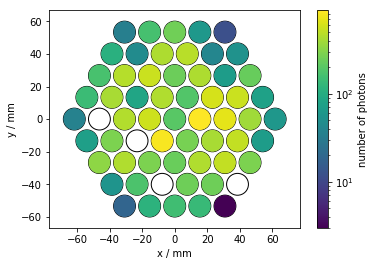

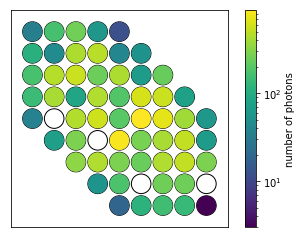

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib.colors import LogNorm


dx = 15.416408  # pixel separation in x-direction [mm]
dy = 13.351001  # pixel separation in x-direction [mm]
radius = dx / 2 - 1  # pixel radius [mm]

# coordinates (axial hex-grid) for each pixel
pixel_coords = np.array([
    [ 0,  0,  0],
    [ 1,  1,  0],
    [ 2, -1,  0],
    [ 3,  0,  1],
    [ 4,  0, -1],
    [ 5,  1, -1],
    [ 6, -1,  1],
    [ 7, -1, -1],
    [ 8,  1,  1],
    [ 9, -2,  1],
    [10,  2, -1],
    [11, -1,  2],
    [12,  1, -2],
    [13,  2,  0],
    [14, -2,  0],
    [15,  2, -2],
    [16,  0,  2],
    [17,  0, -2],
    [18, -2,  2],
    [19,  1,  2],
    [20, -3,  2],
    [21,  3, -2],
    [22, -1, -2],
    [23,  2,  1],
    [24, -3,  1],
    [25,  3, -1],
    [26, -2, -1],
    [27, -2,  3],
    [28, -1,  3],
    [29,  1, -3],
    [30,  2, -3],
    [31,  3,  0],
    [32, -3,  0],
    [33, -3,  3],
    [34,  0, -3],
    [35,  3, -3],
    [36,  0,  3],
    [37,  2,  2],
    [38, -2, -2],
    [39,  4, -2],
    [40, -4,  2],
    [41, -2,  4],
    [42,  2, -4],
    [43, -4,  1],
    [44, -3,  4],
    [45,  3,  1],
    [46, -3, -1],
    [47,  4, -1],
    [48, -1,  4],
    [49,  1, -4],
    [50,  3, -4],
    [51, -4,  3],
    [52, -1, -3],
    [53,  4, -3],
    [54,  1,  3],
    [55, -4,  0],
    [56,  4,  0],
    [57,  0,  4],
    [58, -4,  4],
    [59,  0, -4],
    [60,  4, -4]
    ])


def vector2matrix(image):
    """
    Converts an image 61-vector to a 9x9 matrix according to the pixel definition in coords.
    """
    p,x,y = pixel_coords.T
    matrix = np.zeros((9,9))
    matrix[x+4, y+4] = image
    return matrix

def display_matrix(image=None):
    """
    Display matrix for given image (shape = 61)
    """
    fig, ax = plt.subplots(1)
    circles = [Circle((x, y), 0.45) for p,x,y in pixel_coords]
    coll1 = PatchCollection(circles, facecolor='none', edgecolor='black')
    ax.add_collection(coll1)
    if image is None:
        [plt.text(x, y, p, ha='center', va='center') for p,x,y in pixel_coords]
    else:
        coll2 = PatchCollection(circles, norm=LogNorm())
        coll2.set_array(np.array(image))
        ax.add_collection(coll2)
        cbar = plt.colorbar(coll2)
        cbar.set_label('number of photons')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')
    return fig, ax

def display_camera(image=None):
    """ 
    Display camera for given image (shape = 61)
    """
    fig, ax = plt.subplots(1)
    circles = [Circle(((x+y/2.)*dx, y*dy), radius) for p,x,y in pixel_coords]
    coll1 = PatchCollection(circles, facecolor='none', edgecolor='black')
    ax.add_collection(coll1)
    if image is None:
        [plt.text((x+y/2.)*dx, y*dy, p, ha='center', va='center') for p,x,y in pixel_coords]
    else:
        coll2 = PatchCollection(circles, norm=LogNorm())
        coll2.set_array(np.array(image))
        ax.add_collection(coll2)
        cbar = plt.colorbar(coll2)
        cbar.set_label('number of photons')
    ax.set_xlabel('x / mm')
    ax.set_ylabel('y / mm')
    ax.set_xlim(-5*dx, 5*dx)
    ax.set_ylim(-5*dy, 5*dy)
    ax.set_aspect('equal')
    return fig, ax


if __name__ == "__main__":
    # plot camera layout
    fig, ax = display_camera()
    fig.savefig('layout_camera.png')    
    fig, ax = display_matrix()
    fig.savefig('layout_matrix.png')

    # plot a random image
    image = np.random.randint(0, 10, 61) * np.linspace(100, 1, 61)
    fig, ax = display_camera(image)
    fig.savefig('event_camera.png')
    fig, ax = display_matrix(image)
    fig.savefig('event_matrix.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_91 (InputLayer)           (None, 9, 9, 1)      0                                            
__________________________________________________________________________________________________
conv2d_86 (Conv2D)              (None, 7, 7, 16)     160         input_91[0][0]                   
__________________________________________________________________________________________________
conv2d_87 (Conv2D)              (None, 5, 5, 32)     4640        conv2d_86[0][0]                  
__________________________________________________________________________________________________
global_average_pooling2d_43 (Gl (None, 32)           0           conv2d_87[0][0]                  
__________________________________________________________________________________________________
flatten_41

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Recall score: 0.7938257993384785
Precision score: 0.8520710059171598


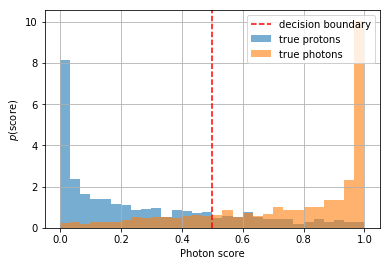

In [82]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
# import famous
from tensorflow import keras
from sklearn.metrics import recall_score, precision_score
layers = keras.layers


"""
The dataset contains 29900 simulated cosmic ray air events detected with
a FAMOUS-61 telescope at the HAWC observatory (courtesy of Merlin Schaufel).
Note: This is a simplified dataset for demonstration purposes.

Your task is to train a classifier that identifies photons from a background of
proton air showers, based on the following features:
- particle  particle type: 0 = proton, 1 = photon
- pixels    shower image: measured photons for each of the 61 pixels
- logE      log10(E / eV) (measured by HAWC or FAMOUS)
- phi       direction phi [rad] (measured by HAWC)
- theta     direction theta [rad] (measured by HAWC)
- rob       impact point [m] (measured by HAWC)

Sub-tasks:
 a) Set up a classification network to discriminate photons from protons.
    The network should use convolutions to work on the shower image and merge in
    the remaining features at some points in the network.
 b) Investigate the number of photons and protons in the dataset.
    When fitting the model, set the class_weights to give equal importance to
    protons and photons.
 c) Train your network to at least 75% test accuracy.
 d) Investigate the distribution of photon scores.
    What are the precision and recall of your model?
    precision = true positives / (true positives + false positives)
    recall = true positives / (true positives + false negatives)
"""

# ---------------------------------------------------
# Load and prepare dataset - you can leave as is.
# ---------------------------------------------------
data = np.load('/content/gdrive/My Drive/Data/data.npz')

# shower image: number of detected photons for each pixel (axial coordinates)
S = np.array([vector2matrix(m) for m in data['pixels']])
S = np.log10(S + 1) / 3

# total number of detected photons
logS = np.log10(np.sum(data['pixels'], axis=1))
logS -= logS.min()

# energy - log10(E / 10 TeV)
logE = data['logE'] - 13

# impact point
Rob = data['rob'] / 7000. - 1.5

# shower direction
xdir = np.cos(data['phi'])
ydir = np.sin(data['phi'])

# select features
X1 = S[..., np.newaxis]
X2 = np.stack([logE, Rob, xdir, ydir], axis=-1)

# target features / labels
y = data['particle']  # gamma = 1, proton = 0
Y = keras.utils.to_categorical(y, 2)

# hold out the last 3000 events as test set
X1_train, X1_test = np.split(X1, [-3000])
X2_train, X2_test = np.split(X2, [-3000])
Y_train, Y_test = np.split(Y, [-3000])


# ---------------------------------------------------
# Model & Training
# ---------------------------------------------------
input1 = layers.Input(shape=(9, 9, 1))  # shower image
input2 = layers.Input(shape=(4,))  # other features

# TODO: define a suitable network with a first convolution part working on the
# shower image, and the remaining features merged in later
z = layers.Conv2D(16,(3,3),activation='relu')(input1)
z = layers.Conv2D(32,(3,3),activation='relu')(z)
z = layers.GlobalAveragePooling2D()(z)
z = layers.Flatten()(z)

z = layers.Concatenate()([z,input2])
z = layers.Dense(32,activation='relu')(z)
z = layers.Dense(16,activation='relu')(z)
output = layers.Dense(2, activation='softmax')(z)

model = keras.models.Model(inputs=[input1, input2], outputs=output)
print(model.summary())

model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(lr=1E-3),
    metrics=['accuracy'])

model.fit(
    [X1_train, X2_train],
    Y_train,
    epochs=100,
    class_weight={0: 1.6, 1: 1})  # set class weights to achieve a balanced matching of photons / protons

model.save('model.h5')


# ---------------------------------------------------
# Evaluation
# ---------------------------------------------------
loss, acc = model.evaluate([X1_test, X2_test], Y_test)
print('Test loss %.3f, test accuracy %.3f' % (loss, acc))


# plot distribution of photon-scores
Yp = model.predict([X1_test, X2_test])
y_test = np.argmax(Y_test, axis=1)
s0 = Yp[~y_test.astype(bool), 1]  # predicted photon-score for true protons
s1 = Yp[y_test.astype(bool), 1]  # predicted photon-score for true photons
fig, ax = plt.subplots(1)
plt.hist(s0, label='true protons', bins=np.linspace(0, 1, 31), alpha=0.6, normed=True)
plt.hist(s1, label='true photons', bins=np.linspace(0, 1, 31), alpha=0.6, normed=True)
plt.axvline(0.5, color='r', linestyle='--', label='decision boundary')
plt.legend()
plt.grid()
plt.xlabel('Photon score')
plt.ylabel('$p$(score)')
plt.savefig('score-distribution.png', bbox_inches='tight')
print("========================================")
yp = np.argmax(Yp, axis=1)
print('Recall score:', recall_score(y_test, yp))
print('Precision score:', precision_score(y_test, yp))


(array([10572., 16328.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

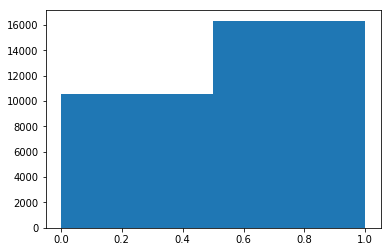

In [81]:
plt.hist(np.argmax(Y_train, axis=1),2)